In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [10]:
df = pd.read_csv("data/FWI_Dataset.csv")

print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
display(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


None


Missing Values:
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64


In [11]:
df.columns = df.columns.str.strip()
print("Cleaned Columns:", df.columns.tolist())
le = LabelEncoder()
df['Classes'] = le.fit_transform(df['Classes'].astype(str))

# Step 2: Fill missing values in Classes using mean
df['Classes'] = df['Classes'].fillna(df['Classes'].mean())

# Step 3: Drop the Classes feature completely
df.drop(columns=['Classes'], inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())

df.head()

Cleaned Columns: ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']
Missing values after cleaning:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia


In [24]:
df.to_csv("data/cleaned_fwi.csv", index=False)
print("Cleaned dataset saved as cleaned_fwi.csv")


Cleaned dataset saved as cleaned_fwi.csv


In [25]:
df = pd.read_csv("data/cleaned_fwi.csv")
print("Loaded Cleaned Dataset")
df.head()


Loaded Cleaned Dataset


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
2,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0
3,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
4,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0


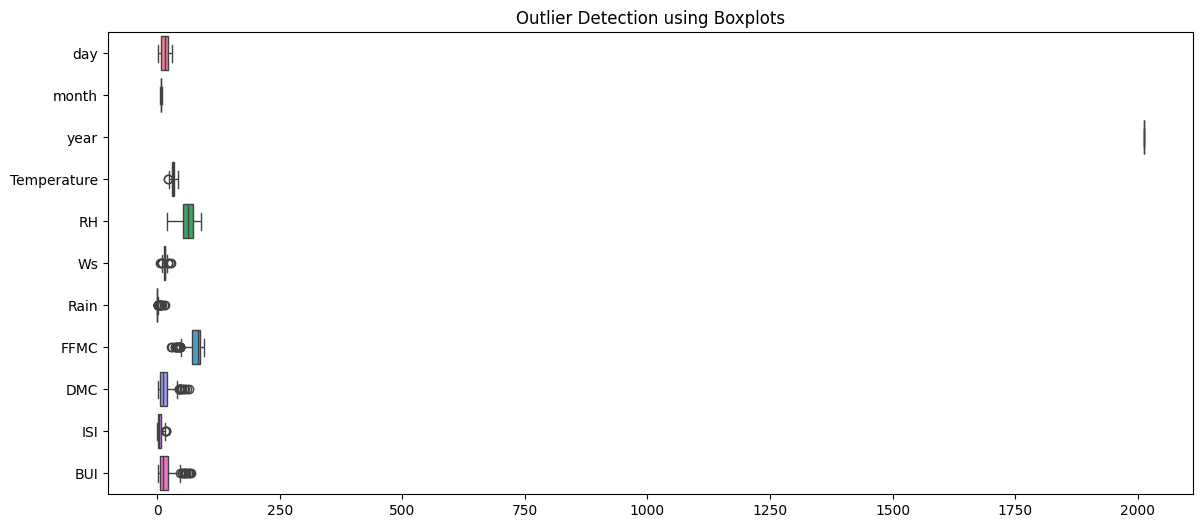

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']), orient='h')
plt.title("Outlier Detection using Boxplots")
plt.show()


In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

df = df.reset_index(drop=True)
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (165, 14)


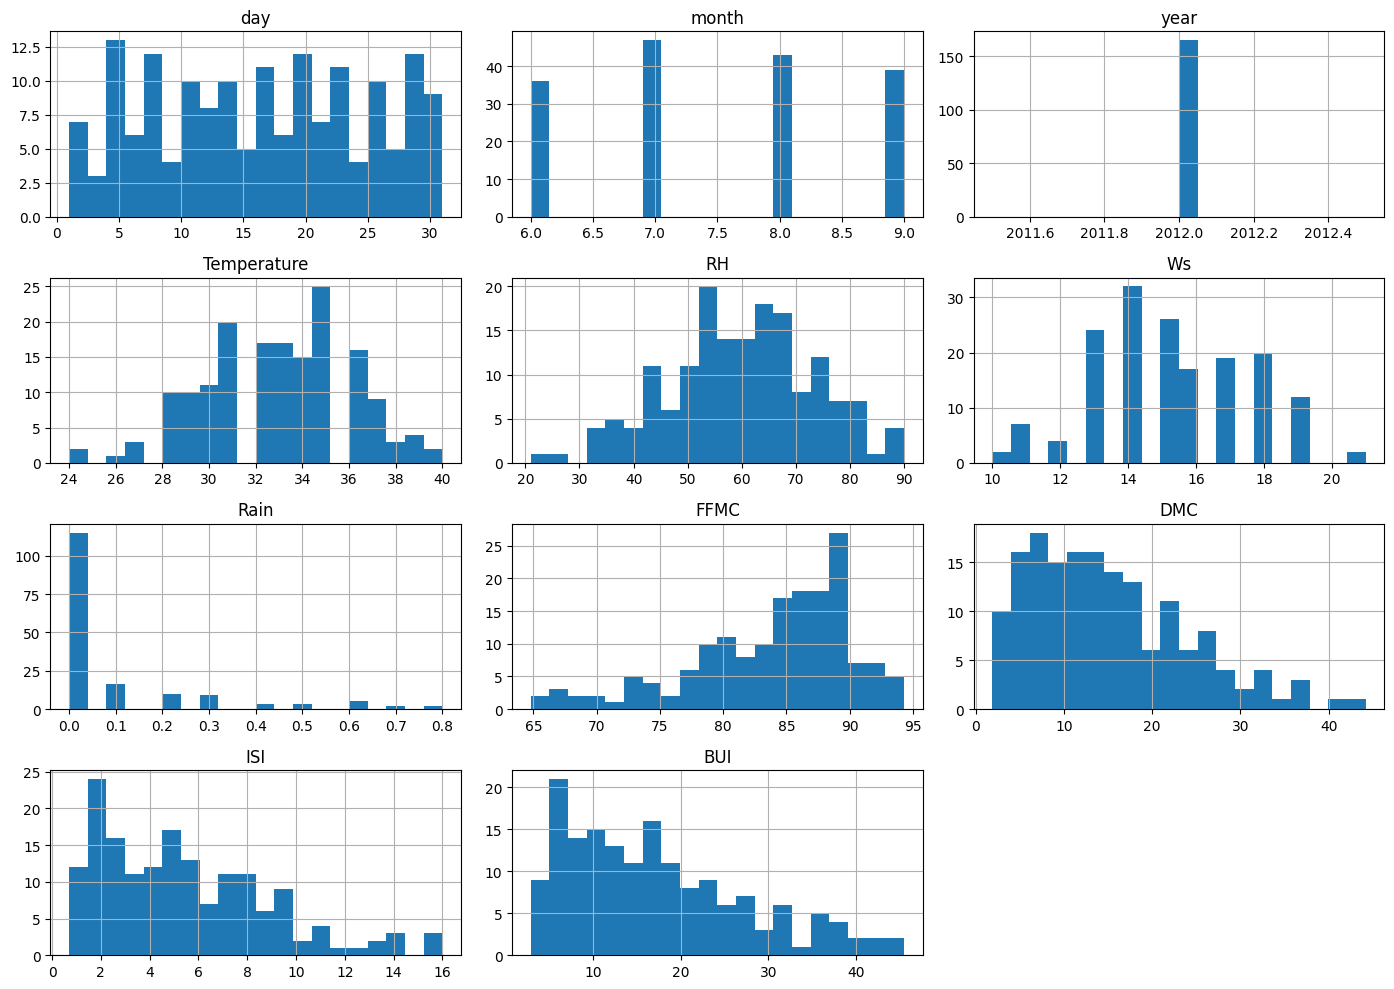

In [17]:
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()


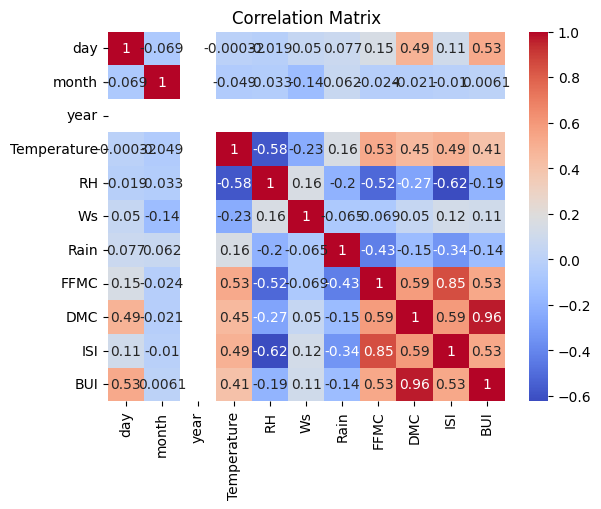

In [20]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



In [21]:
if 'Region' in df.columns:
    le_region = LabelEncoder()
    df['Region'] = le_region.fit_transform(df['Region'].astype(str))
    print("Region column encoded!")
else:
    print("Region column not found!")


Region column encoded!


In [26]:
df.to_csv("data/preprocessed_fwi.csv", index=False)
print("Saved as preprocessed_fwi.csv")


Saved as preprocessed_fwi.csv
